Found 1750 images belonging to 5 classes.
Found 750 images belonging to 5 classes.


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 161s 20s/step - accuracy: 0.1708 - loss: 10.2754 - val_accuracy: 0.2000 - val_loss: 3.3423
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 138s 20s/step - accuracy: 0.1235 - loss: 3.3173 - val_accuracy: 0.5107 - val_loss: 1.4107
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 129s 18s/step - accuracy: 0.4916 - loss: 1.2247 - val_accuracy: 0.4640 - val_loss: 1.2828
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 133s 19s/step - accuracy: 0.6324 - loss: 0.9432 - val_accuracy: 0.5733 - val_loss: 1.1434
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 133s 19s/step - accuracy: 0.6057 - loss: 1.0046 - val_accuracy: 0.6253 - val_loss: 1.1238
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 185s 26s/step - accuracy: 0.6920 - loss: 1.0272 - val_accuracy: 0.5973 - val_loss: 1.1271
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 175s 25s/step - accuracy: 0.7721 - loss: 0.7334 - val_accuracy: 0.7827 - val_loss: 0.6904
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 165s 23s/step - accuracy: 0.7199 - loss: 0.6043 - val_accuracy: 0.6560 - val_loss: 1.2803
Ep

84/84 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.7393 - loss: 1.7783
Validation Accuracy: 72.93%


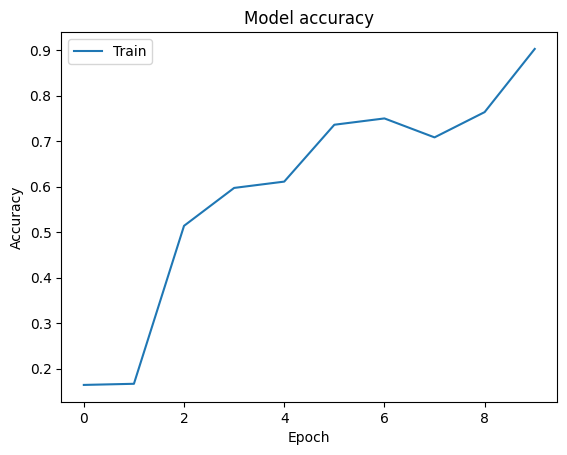

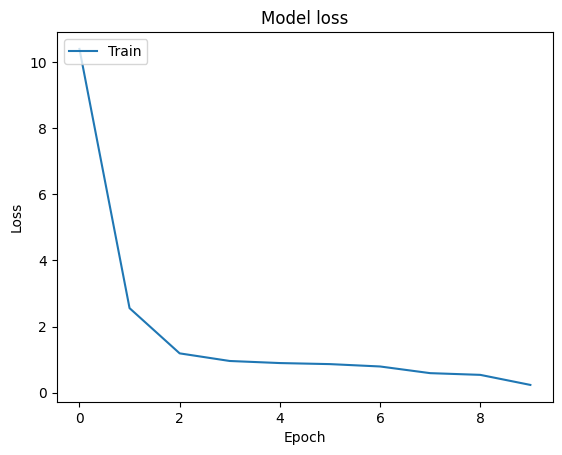

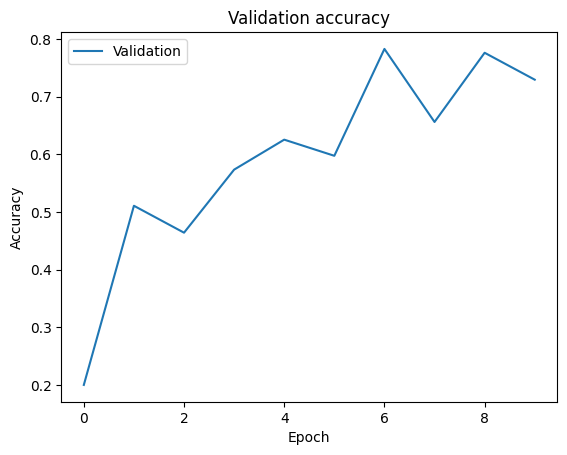

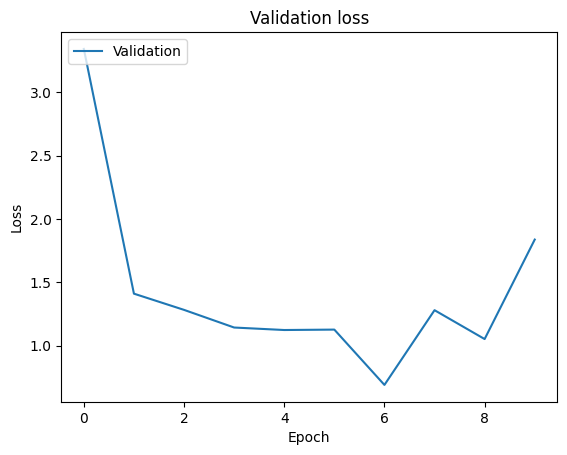

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
The predicted class for the provided image is: Lemon


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from PIL import Image
from keras.models import load_model

# Define the image size and categories
img_height, img_width = 224, 224
categories = ['Aloevera', 'Lemon', 'Lemongrass', 'Maka', 'Turmeric']

# Data preparation
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)
train_dataset = train.flow_from_directory(
    'F:/TY/sem 6/DIP/microproject/Training/', 
    target_size=(img_height, img_width), 
    batch_size=9, 
    class_mode='categorical'
)
validation_dataset = train.flow_from_directory(
    'F:/TY/sem 6/DIP/microproject/validation/', 
    target_size=(img_height, img_width), 
    batch_size=9, 
    class_mode='categorical'
)

# Define the model
num_classes = 5
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_fit = model.fit(train_dataset, steps_per_epoch=8, epochs=10, validation_data=validation_dataset)

# Save the model
model.save('model.h5')

loss, accuracy = model.evaluate(validation_dataset)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')


# Plotting training results
plt.plot(model_fit.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

plt.plot(model_fit.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

plt.plot(model_fit.history['val_accuracy'])
plt.title('Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()

plt.plot(model_fit.history['val_loss'])
plt.title('Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()

# Function to predict image class
def predict_image_class(image_path):
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    predictions = model.predict(img_array)
    predicted_class = categories[np.argmax(predictions)]
    
    return predicted_class

# Example usage
image_path = 'F:/TY/sem 6/DIP/microproject/Testing/Lemon/Lemon_501.jpg'  # Update with the path to your test image
predicted_class = predict_image_class(image_path)
print(f'The predicted class for the provided image is: {predicted_class}')
